In [1]:
import pandas as pd
data=pd.read_csv('APM_FILE_ORDER_MHANSEN_03142019205647 2.csv')
data.head()

,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,OFF_DAY,...,OAG_S_ARR,T_OAG_S_AR,ADJ_OAG_ARR,T_ADJ_OAG_ARR,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR
0,201804,24,11,1,201804,24,16,3,201804,24,...,1209069030,16:30,1209069030,16:30,1209068334,16:18,0.9,0,0,0
1,201801,7,6,3,201801,7,11,2,201801,7,...,1199805580,11:19,1199805580,11:19,1199804764,11:06,0.0,0,0,0
2,201803,9,1,3,201803,9,2,3,201803,9,...,1205048262,02:37,1205048262,02:37,1205050094,03:08,0.0,16,31,31
3,201804,1,13,3,201804,1,15,1,201804,1,...,1207077162,15:12,1207077162,15:12,1207080274,16:04,0.0,9,52,52
4,201801,9,22,1,201801,10,0,3,201801,9,...,1200026082,00:34,1200026082,00:34,1200024032,00:00,0.0,0,0,0


In [2]:
len(data)

220358

In [3]:
taxi_out=data[['OOOI_DEP','T_OOOI_DEP','TAXI_OUT']]
taxi_out.head()

,OOOI_DEP,T_OOOI_DEP,TAXI_OUT
0,1209050040,11:14,21
1,1199792182,06:36,23
2,1205045040,01:44,23
3,1207073580,14:13,19
4,1200018240,21:24,17


In [4]:
taxi_out['time']=pd.to_datetime(taxi_out['OOOI_DEP'], unit='s',origin=pd.Timestamp('1980-01-01'))
taxi_out['time']=pd.to_datetime(taxi_out['time']).dt.tz_localize("GMT").dt.tz_convert('US/Eastern').dt.tz_localize(None)
taxi_out['day']=taxi_out['time'].dt.dayofweek+1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [5]:
taxi_out['hour']=taxi_out['time'].dt.hour
taxi_out.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OOOI_DEP,T_OOOI_DEP,TAXI_OUT,time,day,hour
0,1209050040,11:14,21,2018-04-24 11:14:00,2,11
1,1199792182,06:36,23,2018-01-07 06:36:22,7,6
2,1205045040,01:44,23,2018-03-09 01:44:00,5,1
3,1207073580,14:13,19,2018-04-01 14:13:00,7,14
4,1200018240,21:24,17,2018-01-09 21:24:00,2,21


In [6]:
cluster=taxi_out[['time','TAXI_OUT','hour']].set_index('time')

In [7]:
import numpy as np
clusterday=cluster.groupby([pd.Grouper(freq="D"),'hour']).agg(np.mean)
clusterday=clusterday.unstack(level=-1)
#cluster=taxi_out.groupby([taxi_out.time.dt.hour])#['TAXI_OUT'].agg(np.mean)

In [8]:
clusterday.head()

TAXI_OUT                                                     \
hour               0          1      2          3          4          5    
time                                                                       
2018-01-01  22.142857  20.833333  19.50  14.000000  19.000000  18.500000   
2018-01-02  20.272727  20.285714  13.75  16.333333  23.666667  17.000000   
2018-01-03  16.352941  17.200000  15.00  13.000000        NaN  16.142857   
2018-01-04  20.444444  18.600000  14.00  19.000000  61.000000  68.000000   
2018-01-05        NaN        NaN    NaN        NaN        NaN        NaN   

                                                          ...                 \
hour               6          7          8          9     ...             14   
time                                                      ...                  
2018-01-01  22.933333  22.393939  30.272727  25.655172    ...      22.827586   
2018-01-02  18.285714  24.871795  18.979167  22.083333    ...      21.172414   
2018-01-03  18.842105  21.388889  25.125000  21.473684    ...      18.714286   
2018-01-04  58.000000  61.800000  73.500000  40.500000    ...      54.000000   
2018-01-05        NaN  42.333333  77.571429  55.750000    ...      70.705882   

                                                                     \
hour               15          16          17         18         19   
time                                                                  
2018-01-01  27.225806   21.787879   23.266667  28.416667  24.744186   
2018-01-02  31.405405   21.357143   20.547619  20.093750  25.976744   
2018-01-03  21.147059   20.750000   26.382353  36.200000  37.772727   
2018-01-04        NaN         NaN         NaN        NaN        NaN   
2018-01-05  90.636364  116.961538  104.703704  80.666667  56.153846   

                                                        
hour               20         21         22         23  
time                                                    
2018-01-01  25.307692  24.428571  21.400000  22.000000  
2018-01-02  25.636364  26.925000  24.129032  20.250000  
2018-01-03  31.142857  21.828571  19.880000  17.090909  
2018-01-04        NaN        NaN        NaN        NaN  
2018-01-05  40.571429  37.571429  43.782609  41.120000  

[5 rows x 24 columns]

In [35]:
clusterday=clusterday.dropna()
len(clusterday)

260

In [36]:
clusterday.head()

TAXI_OUT                                                         \
hour               0          1          2          3          4          5    
time                                                                           
2018-01-01  22.142857  20.833333  19.500000  14.000000  19.000000  18.500000   
2018-01-02  20.272727  20.285714  13.750000  16.333333  23.666667  17.000000   
2018-01-06  27.300000  21.500000  30.333333  26.090909  23.250000  24.166667   
2018-01-07  22.714286  21.363636  20.400000  28.000000  19.000000  22.333333   
2018-01-08  22.000000  18.200000  19.666667  19.166667  21.000000  20.500000   

                                                          ...                 \
hour               6          7          8          9     ...             14   
time                                                      ...                  
2018-01-01  22.933333  22.393939  30.272727  25.655172    ...      22.827586   
2018-01-02  18.285714  24.871795  18.979167  22.083333    ...      21.172414   
2018-01-06  33.266667  36.222222  26.842105  25.884615    ...      22.357143   
2018-01-07  24.555556  20.368421  20.346154  26.657895    ...      23.777778   
2018-01-08  19.642857  20.428571  20.755556  18.690476    ...      38.115385   

                                                                              \
hour               15         16         17         18         19         20   
time                                                                           
2018-01-01  27.225806  21.787879  23.266667  28.416667  24.744186  25.307692   
2018-01-02  31.405405  21.357143  20.547619  20.093750  25.976744  25.636364   
2018-01-06  33.058824  40.416667  25.576923  27.913043  27.733333  26.619048   
2018-01-07  29.461538  21.517241  27.720930  24.848485  24.160000  17.800000   
2018-01-08  38.677419  45.818182  50.000000  51.826087  45.793103  30.629630   

                                             
hour               21         22         23  
time                                         
2018-01-01  24.428571  21.400000  22.000000  
2018-01-02  26.925000  24.129032  20.250000  
2018-01-06  33.575000  26.391304  26.384615  
2018-01-07  22.333333  25.200000  24.041667  
2018-01-08  31.166667  30.700000  33.115385  

[5 rows x 24 columns]

In [37]:
first=clusterday.iloc[:,0:6]
first.head(10)

TAXI_OUT                                                       
hour                0          1          2          3          4          5
time                                                                        
2018-01-01  22.142857  20.833333  19.500000  14.000000  19.000000  18.500000
2018-01-02  20.272727  20.285714  13.750000  16.333333  23.666667  17.000000
2018-01-06  27.300000  21.500000  30.333333  26.090909  23.250000  24.166667
2018-01-07  22.714286  21.363636  20.400000  28.000000  19.000000  22.333333
2018-01-08  22.000000  18.200000  19.666667  19.166667  21.000000  20.500000
2018-01-09  27.214286  19.333333  23.916667  31.333333  22.333333  23.700000
2018-01-10  17.000000  15.200000  19.166667  23.000000  22.000000  19.100000
2018-01-11  20.727273  21.000000  15.500000  16.500000  21.000000  17.083333
2018-01-15  21.300000  21.636364  19.000000  15.000000  21.000000  18.875000
2018-01-16  18.153846  23.000000  19.000000  11.000000  20.000000  23.636364

In [38]:
first_not=first.dropna()

In [39]:
from sklearn.cluster import KMeans
X1=np.asarray(first_not)
inertia=[]
for i in range (2,60):
    kmeans=KMeans(n_clusters=i).fit(X1)
    inertia.append(kmeans.inertia_)

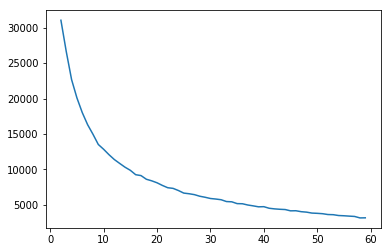

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
a=list(range(2,60))
plt.plot(a,inertia)

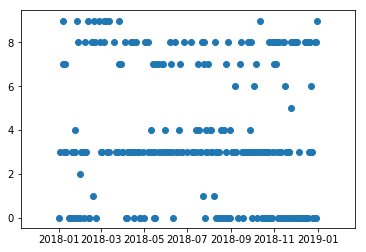

In [41]:
kmeans1=KMeans(n_clusters=10).fit(X1)
group1=pd.DataFrame(kmeans1.labels_)
first_not['group']=kmeans1.labels_
plt.scatter(first_not.index,first_not['group']);

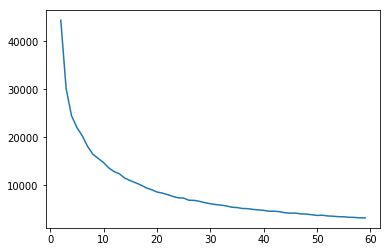

In [42]:
second=clusterday.iloc[:,6:12]
second_not=second.dropna()
X2=np.asarray(second_not)
inertia=[]
for i in range (2,60):
    kmeans=KMeans(n_clusters=i).fit(X2)
    inertia.append(kmeans.inertia_)
a=list(range(2,60))
plt.plot(a,inertia)

In [43]:
len(second_not)

260

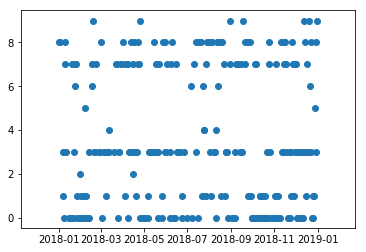

In [44]:
kmeans2=KMeans(n_clusters=10).fit(X2)
group1=pd.DataFrame(kmeans2.labels_)
second_not['group']=kmeans2.labels_
plt.scatter(second_not.index,second_not['group']);

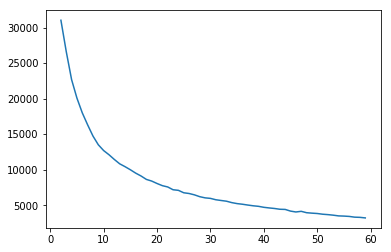

In [45]:
third=clusterday.iloc[:,12:18]
third_not=third.dropna()
X3=np.asarray(third_not)
inertia=[]
for i in range (2,60):
    kmeans=KMeans(n_clusters=i).fit(X1)
    inertia.append(kmeans.inertia_)
a=list(range(2,60))
plt.plot(a,inertia)


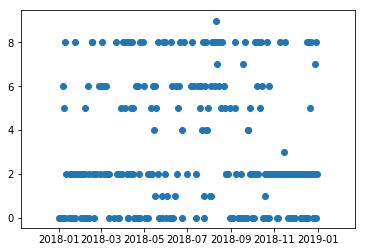

In [46]:
kmeans3=KMeans(n_clusters=10).fit(X3)
group1=pd.DataFrame(kmeans3.labels_)
third_not['group']=kmeans3.labels_
plt.scatter(third_not.index,third_not['group']);

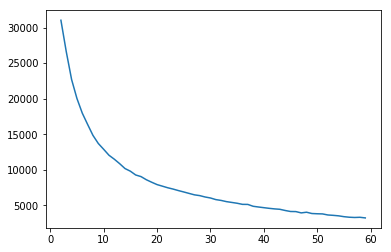

In [47]:
forth=clusterday.iloc[:,18:24]
forth_not=forth.dropna()
X4=np.asarray(forth_not)
inertia=[]
for i in range (2,60):
    kmeans=KMeans(n_clusters=i).fit(X1)
    inertia.append(kmeans.inertia_)
a=list(range(2,60))
plt.plot(a,inertia)

In [48]:
len(first_not)

260

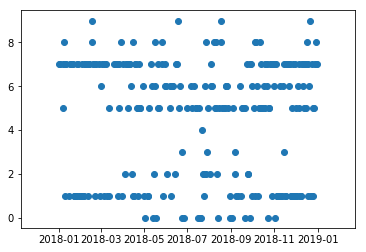

In [49]:
kmeans4=KMeans(n_clusters=10).fit(X4)
group1=pd.DataFrame(kmeans4.labels_)
forth_not['group']=kmeans4.labels_
plt.scatter(forth_not.index,forth_not['group']);

In [51]:
import sklearn
con12=sklearn.metrics.cluster.contingency_matrix(kmeans1.labels_,kmeans2.labels_)
con12=pd.DataFrame(con12)
con12

,0,1,2,3,4,5,6,7,8,9
0,26,9,0,11,0,0,1,9,6,3
1,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0
3,27,10,0,21,1,1,0,17,18,1
4,0,0,0,4,0,0,1,2,5,1
5,0,0,0,1,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,2,0
7,3,1,0,7,1,0,0,6,2,0
8,11,8,1,13,1,1,3,5,3,0
9,1,4,0,4,1,0,0,0,0,1


In [77]:
a=con12.drop([2,4,5,6,9],axis=1).drop([1,2,4,5,6,9])
scipy.stats.chi2_contingency(a)

(17.706133501292346,
 0.12490901282698177,
 12,
 array([[19.18779343,  8.01877934, 14.89201878, 10.59624413,  8.30516432],
        [29.25352113, 12.22535211, 22.70422535, 16.15492958, 12.66197183],
        [ 5.97652582,  2.49765258,  4.63849765,  3.30046948,  2.58685446],
        [12.58215962,  5.25821596,  9.76525822,  6.94835681,  5.44600939]]))

In [78]:
a

,0,1,3,7,8
0,26,9,11,9,6
3,27,10,21,17,18
7,3,1,7,6,2
8,11,8,13,5,3


In [52]:
con23=pd.DataFrame(sklearn.metrics.cluster.contingency_matrix(kmeans2.labels_,kmeans3.labels_))
con23

,0,1,2,3,4,5,6,7,8,9
0,18,1,35,0,1,2,5,0,7,0
1,10,2,7,0,3,3,5,0,2,0
2,0,0,2,0,0,0,0,0,0,0
3,15,2,29,0,0,2,6,0,9,0
4,2,1,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,1,0,0
6,1,0,0,0,0,1,1,0,3,0
7,6,1,14,0,0,4,4,0,10,0
8,9,1,2,1,3,5,6,1,8,0
9,2,0,2,0,0,0,0,1,2,0


In [80]:
b=con23.drop([1,3,4,5,6,7,9],axis=1).drop([2,4,5,6,9])
scipy.stats.chi2_contingency(b)

(24.001186949970894,
 0.0022907412678124114,
 8,
 array([[19.22651934, 28.83977901, 11.93370166],
        [ 6.08839779,  9.13259669,  3.77900552],
        [16.98342541, 25.47513812, 10.54143646],
        [ 9.61325967, 14.4198895 ,  5.96685083],
        [ 6.08839779,  9.13259669,  3.77900552]]))

In [81]:
b

,0,2,8
0,18,35,7
1,10,7,2
3,15,29,9
7,6,14,10
8,9,2,8


In [53]:
con34=pd.DataFrame(sklearn.metrics.cluster.contingency_matrix(kmeans3.labels_,kmeans4.labels_))
con34

,0,1,2,3,4,5,6,7,8,9
0,3,19,0,0,0,17,5,19,0,0
1,0,0,4,0,0,1,1,0,2,0
2,2,30,0,0,0,9,10,40,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,4,2,1,0,0,0,0,0
5,4,0,1,1,0,2,1,2,5,2
6,3,4,0,0,0,8,7,5,0,0
7,0,0,1,0,0,1,0,1,0,0
8,3,6,3,0,0,7,7,6,7,2
9,0,0,0,0,0,0,0,0,1,0


In [82]:
c=con34.drop([0,2,3,4,8,9],axis=1).drop([1,3,4,5,7,9])
scipy.stats.chi2_contingency(c)

(24.827666368322998,
 0.003167846371195125,
 9,
 array([[17.78894472, 12.36180905,  8.74371859, 21.10552764],
        [26.38693467, 18.33668342, 12.96984925, 31.30653266],
        [ 7.11557789,  4.94472362,  3.49748744,  8.44221106],
        [ 7.70854271,  5.35678392,  3.78894472,  9.14572864]]))

In [83]:
c

,1,5,6,7
0,19,17,5,19
2,30,9,10,40
6,4,8,7,5
8,6,7,7,6


In [54]:
con41=pd.DataFrame(sklearn.metrics.cluster.contingency_matrix(kmeans4.labels_,kmeans1.labels_))
con41

,0,1,2,3,4,5,6,7,8,9
0,3,0,0,5,1,0,0,3,3,0
1,18,0,1,15,2,1,2,3,14,3
2,1,1,0,5,1,0,1,0,4,0
3,1,0,0,3,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
5,13,0,0,17,4,0,1,3,5,2
6,7,0,0,16,1,0,0,3,4,0
7,20,1,0,28,2,0,0,5,11,6
8,1,1,0,6,2,0,0,3,2,0
9,1,0,0,1,0,0,0,0,2,0


In [84]:
d=con41.drop([1,2,4,5,6,7,9],axis=1).drop([0,2,3,4,8,9])
scipy.stats.chi2_contingency(d)

(7.212917846324589,
 0.3016048835824775,
 6,
 array([[16.22619048, 21.26190476,  9.51190476],
        [12.08333333, 15.83333333,  7.08333333],
        [ 9.32142857, 12.21428571,  5.46428571],
        [20.36904762, 26.69047619, 11.94047619]]))

In [66]:
import scipy
chi41=scipy.stats.chi2_contingency(con41)
chi41

(67.21434908399512,
 0.8639603350940076,
 81,
 array([[3.75000000e+00, 1.73076923e-01, 5.76923077e-02, 5.53846154e+00,
         7.50000000e-01, 5.76923077e-02, 2.30769231e-01, 1.15384615e+00,
         2.65384615e+00, 6.34615385e-01],
        [1.47500000e+01, 6.80769231e-01, 2.26923077e-01, 2.17846154e+01,
         2.95000000e+00, 2.26923077e-01, 9.07692308e-01, 4.53846154e+00,
         1.04384615e+01, 2.49615385e+00],
        [3.25000000e+00, 1.50000000e-01, 5.00000000e-02, 4.80000000e+00,
         6.50000000e-01, 5.00000000e-02, 2.00000000e-01, 1.00000000e+00,
         2.30000000e+00, 5.50000000e-01],
        [1.00000000e+00, 4.61538462e-02, 1.53846154e-02, 1.47692308e+00,
         2.00000000e-01, 1.53846154e-02, 6.15384615e-02, 3.07692308e-01,
         7.07692308e-01, 1.69230769e-01],
        [2.50000000e-01, 1.15384615e-02, 3.84615385e-03, 3.69230769e-01,
         5.00000000e-02, 3.84615385e-03, 1.53846154e-02, 7.69230769e-02,
         1.76923077e-01, 4.23076923e-02],
        [1.125

In [67]:
import scipy
chi12=scipy.stats.chi2_contingency(con12)
chi12

(230.06063587068434,
 3.277955493567405e-16,
 81,
 array([[1.72500000e+01, 8.00000000e+00, 5.00000000e-01, 1.57500000e+01,
         1.00000000e+00, 5.00000000e-01, 1.50000000e+00, 9.75000000e+00,
         9.00000000e+00, 1.75000000e+00],
        [7.96153846e-01, 3.69230769e-01, 2.30769231e-02, 7.26923077e-01,
         4.61538462e-02, 2.30769231e-02, 6.92307692e-02, 4.50000000e-01,
         4.15384615e-01, 8.07692308e-02],
        [2.65384615e-01, 1.23076923e-01, 7.69230769e-03, 2.42307692e-01,
         1.53846154e-02, 7.69230769e-03, 2.30769231e-02, 1.50000000e-01,
         1.38461538e-01, 2.69230769e-02],
        [2.54769231e+01, 1.18153846e+01, 7.38461538e-01, 2.32615385e+01,
         1.47692308e+00, 7.38461538e-01, 2.21538462e+00, 1.44000000e+01,
         1.32923077e+01, 2.58461538e+00],
        [3.45000000e+00, 1.60000000e+00, 1.00000000e-01, 3.15000000e+00,
         2.00000000e-01, 1.00000000e-01, 3.00000000e-01, 1.95000000e+00,
         1.80000000e+00, 3.50000000e-01],
        [2

In [68]:
import scipy
chi23=scipy.stats.chi2_contingency(con23)
chi23

(206.84182127410426,
 5.722967761479666e-13,
 81,
 array([[1.67192308e+01, 2.12307692e+00, 2.41500000e+01, 2.65384615e-01,
         1.85769231e+00, 4.77692308e+00, 7.16538462e+00, 7.96153846e-01,
         1.08807692e+01, 2.65384615e-01],
        [7.75384615e+00, 9.84615385e-01, 1.12000000e+01, 1.23076923e-01,
         8.61538462e-01, 2.21538462e+00, 3.32307692e+00, 3.69230769e-01,
         5.04615385e+00, 1.23076923e-01],
        [4.84615385e-01, 6.15384615e-02, 7.00000000e-01, 7.69230769e-03,
         5.38461538e-02, 1.38461538e-01, 2.07692308e-01, 2.30769231e-02,
         3.15384615e-01, 7.69230769e-03],
        [1.52653846e+01, 1.93846154e+00, 2.20500000e+01, 2.42307692e-01,
         1.69615385e+00, 4.36153846e+00, 6.54230769e+00, 7.26923077e-01,
         9.93461538e+00, 2.42307692e-01],
        [9.69230769e-01, 1.23076923e-01, 1.40000000e+00, 1.53846154e-02,
         1.07692308e-01, 2.76923077e-01, 4.15384615e-01, 4.61538462e-02,
         6.30769231e-01, 1.53846154e-02],
        [4

In [69]:
import scipy
chi34=scipy.stats.chi2_contingency(con34)
chi34

(362.8172531342571,
 2.6839721474700466e-37,
 81,
 array([[3.63461538e+00, 1.42961538e+01, 3.15000000e+00, 9.69230769e-01,
         2.42307692e-01, 1.09038462e+01, 7.51153846e+00, 1.76884615e+01,
         3.63461538e+00, 9.69230769e-01],
        [4.61538462e-01, 1.81538462e+00, 4.00000000e-01, 1.23076923e-01,
         3.07692308e-02, 1.38461538e+00, 9.53846154e-01, 2.24615385e+00,
         4.61538462e-01, 1.23076923e-01],
        [5.25000000e+00, 2.06500000e+01, 4.55000000e+00, 1.40000000e+00,
         3.50000000e-01, 1.57500000e+01, 1.08500000e+01, 2.55500000e+01,
         5.25000000e+00, 1.40000000e+00],
        [5.76923077e-02, 2.26923077e-01, 5.00000000e-02, 1.53846154e-02,
         3.84615385e-03, 1.73076923e-01, 1.19230769e-01, 2.80769231e-01,
         5.76923077e-02, 1.53846154e-02],
        [4.03846154e-01, 1.58846154e+00, 3.50000000e-01, 1.07692308e-01,
         2.69230769e-02, 1.21153846e+00, 8.34615385e-01, 1.96538462e+00,
         4.03846154e-01, 1.07692308e-01],
        [1

In [6]:
import scipy
import sklearn
import numpy as np
from scipy import stats
con=np.array([23,34,45,24])
con=con.reshape(2,2)
x=scipy.stats.chi2_contingency(con)
x

(6.800672806011854, 0.00911235277682372, 1, array([[30.76190476, 26.23809524],
        [37.23809524, 31.76190476]]))